In [6]:
import os
import numpy as np
from numba import jit
from scipy import signal

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from IPython.display import clear_output, display

In [2]:
figsave_dir = 'out\\'
figsave_format = 'pdf'
figsave_dpi = 200

# Scale for matplotlib scatter plots to show all bodies
s_scale = 1e8

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Mandelbrot set

In [3]:
@jit(nopython=True)
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

In [5]:
@jit(nopython=True)
def mandelbrot_set(x_min, x_max, y_min, y_max, max_iter,
                   width, height):
    
    r1 = np.linspace(y_min, y_max, width)
    r2 = np.linspace(x_min, x_max, height)
    n3 = np.zeros((width, height))
    
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j], max_iter)
    
    return (r1, r2, n3)

In [11]:
# x_min, x_max, y_min, y_max, max_iter
iters = {
    1 : [-2, 2, -2, 2, 64],
    2 : [-1, -0.5, -0.25, 0.25, 128],
    3 : [-0.7, -0.5, -0.1, 0.1, 256],
    4 : [-0.675, -0.625, -0.1, -0.05, 512],
    5 : [-0.6625, -0.6375, -0.1, -0.075, 1024],
    6 : [-0.6525, -0.6475, -0.095, -0.09, 2048],
    7 : [-0.65025, -0.64975, -0.09275, -0.09225, 2048],
    8 : [-0.64990, -0.64980, -0.09255, -0.09245, 4096],
    9 : [-0.649875, -0.64985, -0.0925125, -0.0924875, 4096],
    10 : [0.06, 0.07, -0.75, -0.74, 2048],
    11 : [0.06505, 0.06510, -0.74877, -0.74872, 4096],
}
n = 11
r1, r2, n3 = mandelbrot_set(*iters[n],
                            width = 1000, height = 1000)

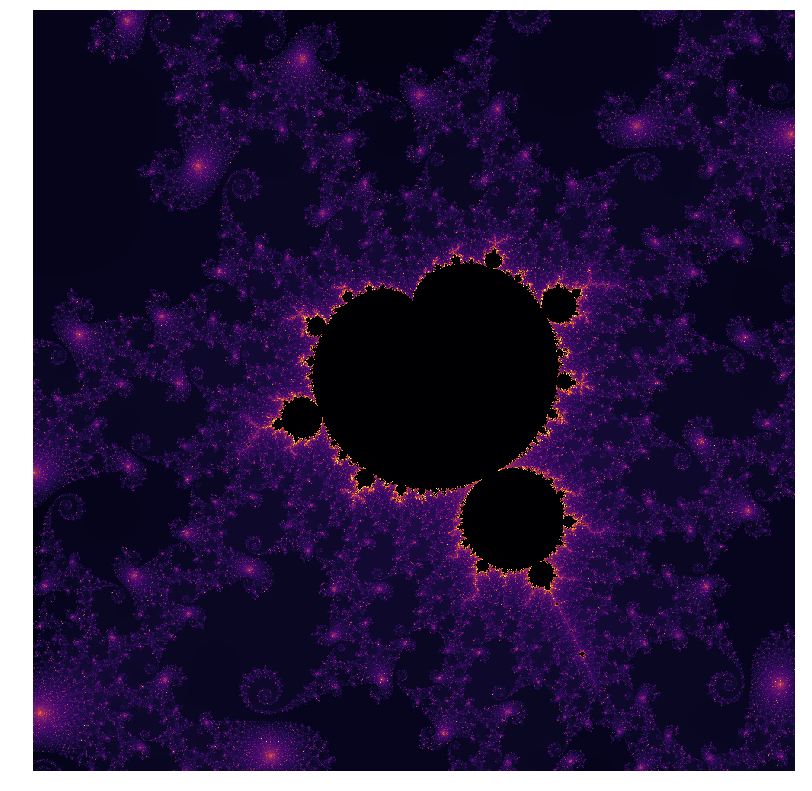

In [12]:
save = False
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*14))

axes.imshow(n3, cmap='inferno')
axes.axis('off')

if save:
    plt.imsave(figsave_dir +
               'mandelbrot_{0}_xmin_{1}_xmax_{2}_ymin_{3}_ymax_{4}_maxiter_{5}'.format(n, *iters[n])\
               +\
               '.png',
               n3, cmap='inferno')

plt.show()

## Logistic function

$$
x_{n+1}
=
r x_{n} \cdot \left( 1 - x_{n} \right)
$$

In [3]:
def logistic(r, x):
    return r * x * (1 - x)

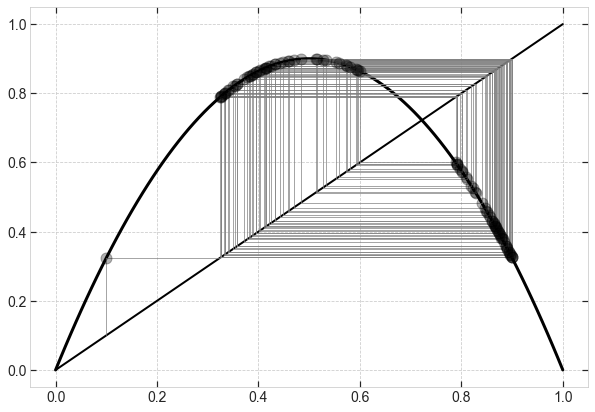

In [4]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*7))

axisticksize = 14
scattersize = 11

r = 3.6
x = 0.1
t = np.linspace(0,1,100)

axes.plot(t, logistic(r, t),
          color='k', lw=3)
axes.plot([0, 1], [0, 1],
          color='k', lw=2)

n = 100
for i in range(n):
    y = logistic(r, x)
    
    axes.plot([x, x], [x, y],
              color='grey', lw=1, alpha=0.7)
    axes.plot([x, y], [y, y],
              color='grey', lw=1, alpha=0.7)
    
    axes.scatter(x, y, s=scattersize**2,
                 color='k', alpha=0.3, zorder=3)
    
    x = y

axes.tick_params(axis='both', which='major', labelsize=axisticksize)
    
plt.show()

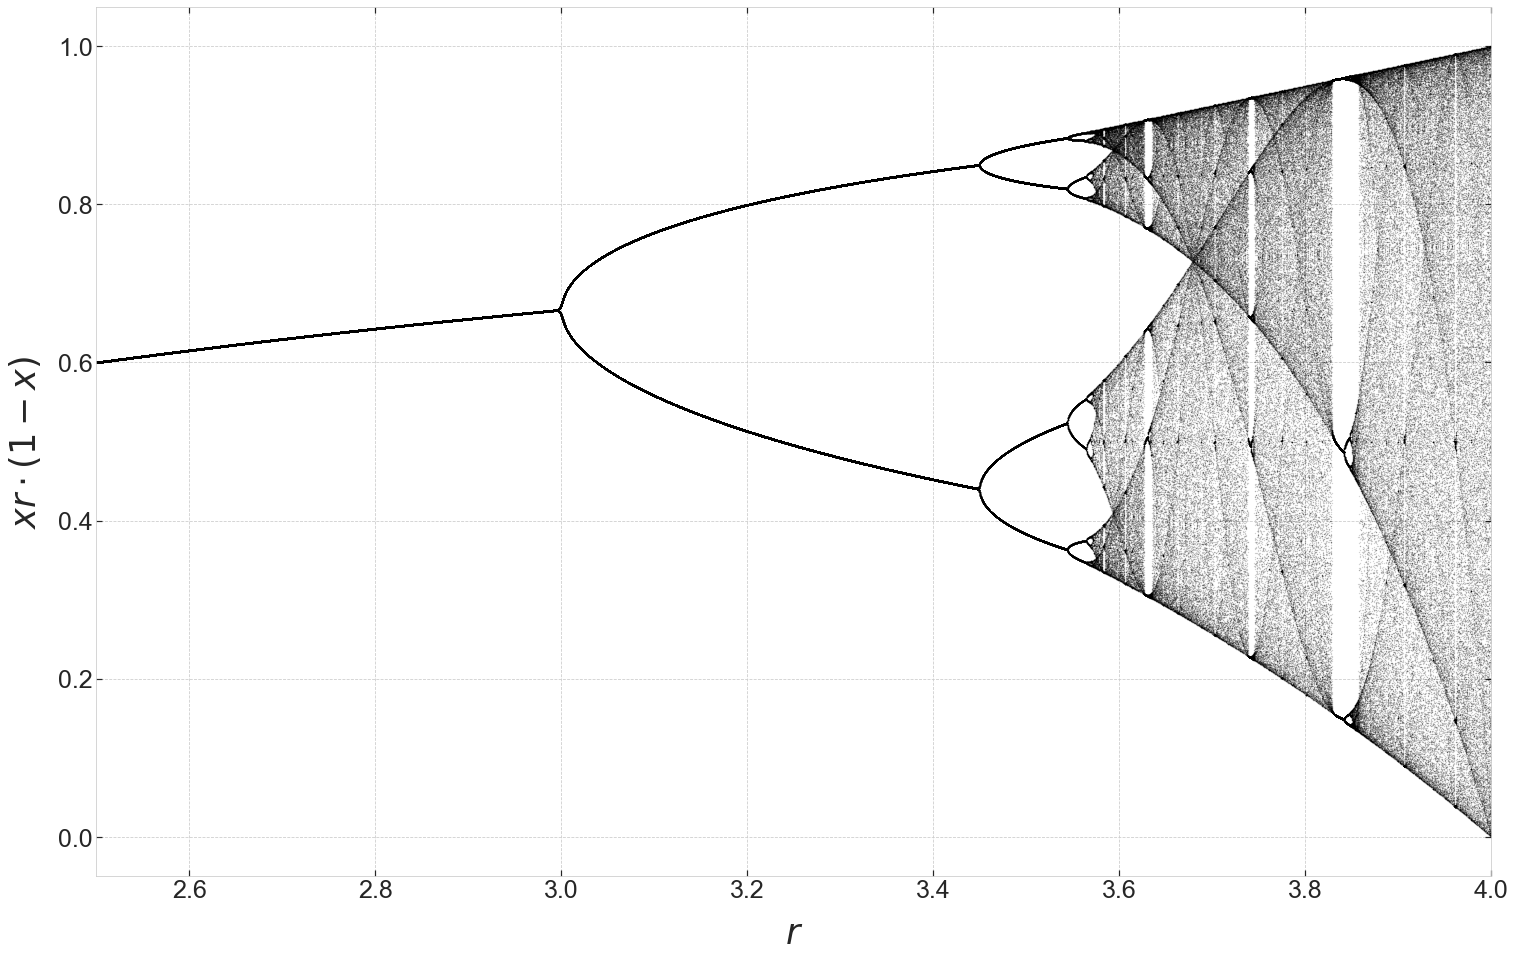

In [80]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*25, nrows*16))

axislabelsize = 35
axisticksize = 25
scattersize = 0.3

labelpad = 15

n = 10000
r = np.linspace(2.5,4,n)
x = 1e-5 * np.ones(n)
iterations = 1000
last = 100

for i in range(iterations):
    x = logistic(r, x)
    # Displaying the bifurcation diagram.
    if i >= (iterations - last):
        axes.scatter(r, x,
                     color='k', s=scattersize**2, alpha=0.25)

axes.set_xlabel('$r$', fontsize=axislabelsize, labelpad=labelpad)
axes.set_ylabel('$x r \cdot (1 - x)$', fontsize=axislabelsize, labelpad=labelpad)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)
axes.set_xlim(2.5,4)


plt.show()

In [141]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
time = np.arange(N) / float(fs)
mod = 1000*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
# Apply gaussian noise
noise_power = 0.03 * fs / 2
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

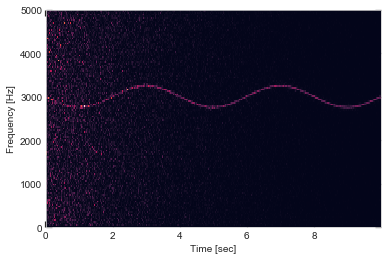

In [142]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()